In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('/Users/apple/Desktop/Data science/py-master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df['Age'].max()

43

In [6]:
df['Income($)'].max()

162000

In [7]:
def stand(x):
    x=x/df['Age'].max()
    return(x)
def stand1(x):
    x=x/df['Income($)'].max()
    return(x)

In [8]:
df['Age_n']=df['Age'].apply(stand)
df['Income($)_n']=df['Income($)'].apply(stand1)

In [9]:
df.head()

,Name,Age,Income($),Age_n,Income($)_n
0,Rob,27,70000,0.627907,0.432099
1,Michael,29,90000,0.674419,0.555556
2,Mohan,29,61000,0.674419,0.376543
3,Ismail,28,60000,0.651163,0.370370
4,Kory,42,150000,0.976744,0.925926


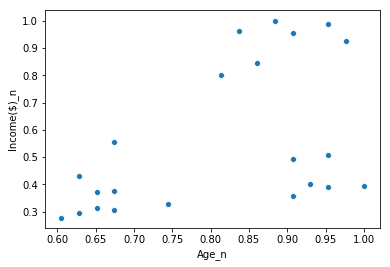

In [10]:
sns.scatterplot(x='Age_n',y='Income($)_n',data=df)

In [11]:
km=KMeans(n_clusters=3)

In [13]:
y_predict=km.fit_predict(df[['Age_n','Income($)_n']])

In [14]:
df['Target']=y_predict

In [15]:
df.head()

,Name,Age,Income($),Age_n,Income($)_n,Target
0,Rob,27,70000,0.627907,0.432099,1
1,Michael,29,90000,0.674419,0.555556,1
2,Mohan,29,61000,0.674419,0.376543,1
3,Ismail,28,60000,0.651163,0.370370,1
4,Kory,42,150000,0.976744,0.925926,0


In [17]:
df0=df.loc[df['Target']==0]
df1=df.loc[df['Target']==1]
df2=df.loc[df['Target']==2]

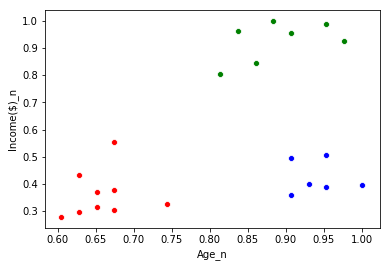

In [24]:
sns.scatterplot(x='Age_n',y='Income($)_n',data=df0,color='g',marker='o')
sns.scatterplot(x='Age_n',y='Income($)_n',data=df1,color='r',marker='o')

sns.scatterplot(x='Age_n',y='Income($)_n',data=df2,color='b',marker='o')



In [32]:
km.cluster_centers_

array([[0.89036545, 0.92592593],
       [0.65891473, 0.36179698],
       [0.94186047, 0.42386831]])

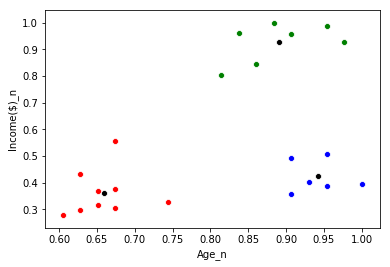

In [35]:
sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
sns.scatterplot(x='Age_n',y='Income($)_n',data=df0,color='g',marker='o')
sns.scatterplot(x='Age_n',y='Income($)_n',data=df1,color='r',marker='o')

sns.scatterplot(x='Age_n',y='Income($)_n',data=df2,color='b',marker='o')




In [37]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age_n','Income($)_n']])
    sse.append(km.inertia_)

In [38]:
sse

[1.9100576740499857,
 0.45517146739115605,
 0.15309136394039244,
 0.10811177971669944,
 0.07115352803026635,
 0.053359801960981106,
 0.0409252299295373,
 0.031063389746409736,
 0.021649843244879688]

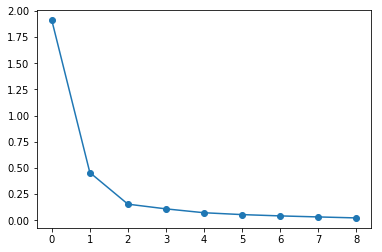

In [40]:
plt.plot(sse,marker='o')